In [1]:
import torch
import torch.utils.data as Data
import numpy as np    
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
TRAIN_DIR = './200_cats_200_dogs'     #Path to the train folder
TEST_DIR = './25_test_cats_dogs'      #Path to the test folder

In [3]:
IMG_SIZE = 80

# Read image files in traing(test) folder and build data set

## You do this only once. You can save and re-load your input tensor

In [4]:
def Read_image_files(DIR_PATH):
    fileNo = 0
    fnamelst = []
    for fname in os.listdir(DIR_PATH):
        print(fname, end=', ')
        fnamelst.append(fname)
        fileNo = fileNo +1
        fname_with_path = DIR_PATH + '/' + fname
        img = Image.open(fname_with_path).resize((IMG_SIZE, IMG_SIZE))
        tensor = torch.from_numpy(np.array(img))
        tensor = tensor.view(1, IMG_SIZE, IMG_SIZE, 3)
        if(fileNo == 1):
            resultx = tensor
        else:
            resultx = torch.cat((resultx, tensor), 0)

        word_label = fname.split('.')[-3]
        if word_label == 'cat': 
            y=torch.FloatTensor([1]).view(1, 1)
        elif word_label == 'dog': 
            y=torch.FloatTensor([0]).view(1, 1)
            
        if(fileNo == 1):
            resulty = y
        else:
            resulty = torch.cat((resulty, y), 0)
    return resultx, resulty, fnamelst

In [5]:
train_x, train_y, fnamelst1 = Read_image_files(TRAIN_DIR)

cat.40.jpg, dog.324.jpg, cat.3.jpg, dog.660.jpg, cat.629.jpg, dog.653.jpg, dog.8.jpg, cat.76.jpg, cat.681.jpg, cat.540.jpg, dog.399.jpg, dog.23.jpg, dog.115.jpg, dog.57.jpg, cat.64.jpg, cat.181.jpg, cat.606.jpg, cat.191.jpg, dog.466.jpg, dog.422.jpg, dog.149.jpg, cat.761.jpg, dog.616.jpg, dog.524.jpg, cat.652.jpg, dog.617.jpg, dog.514.jpg, dog.344.jpg, dog.127.jpg, cat.651.jpg, cat.212.jpg, cat.35.jpg, dog.320.jpg, dog.104.jpg, dog.24.jpg, dog.30.jpg, cat.18.jpg, dog.61.jpg, dog.371.jpg, dog.554.jpg, cat.57.jpg, cat.59.jpg, cat.809.jpg, cat.524.jpg, dog.437.jpg, cat.13.jpg, dog.93.jpg, cat.746.jpg, dog.94.jpg, cat.49.jpg, dog.566.jpg, cat.145.jpg, cat.46.jpg, cat.103.jpg, cat.748.jpg, cat.639.jpg, dog.55.jpg, cat.10.jpg, cat.140.jpg, cat.210.jpg, dog.268.jpg, dog.277.jpg, dog.456.jpg, cat.2.jpg, cat.733.jpg, dog.686.jpg, dog.339.jpg, cat.17.jpg, cat.51.jpg, dog.582.jpg, cat.628.jpg, dog.105.jpg, cat.88.jpg, cat.808.jpg, cat.654.jpg, dog.90.jpg, dog.511.jpg, dog.31.jpg, dog.100.jpg, dog

# Save and re-load a large tensor

In [10]:
torch.save(train_x, './train_x.tensor')  

In [11]:
torch.save(train_y, './train_y.tensor') 

In [12]:
train_x1 = torch.load('./train_x.tensor')  

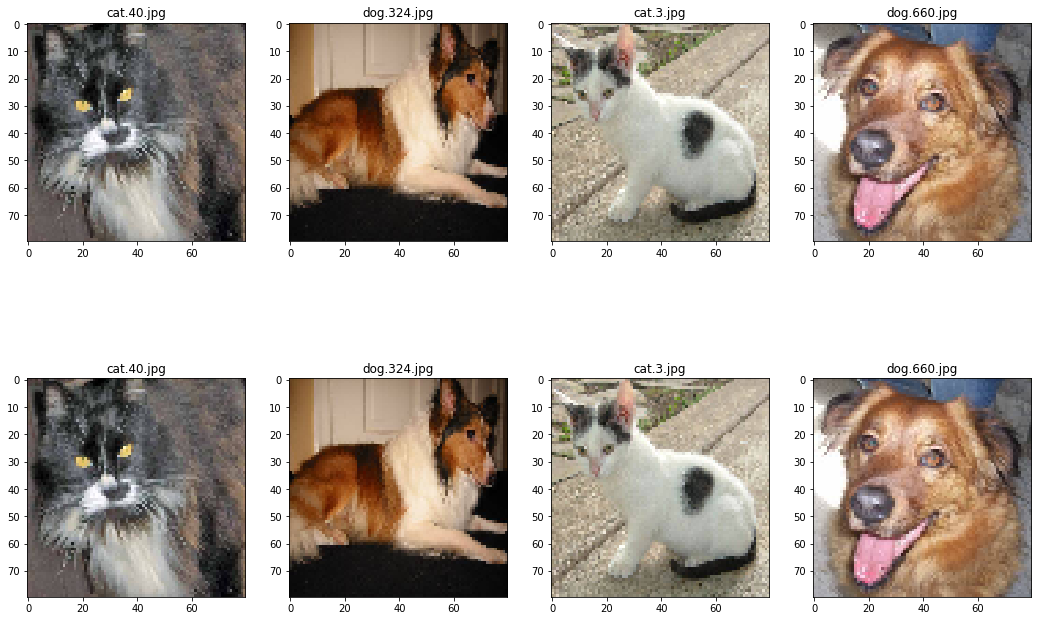

In [13]:
fig = plt.figure(figsize=(18, 12)) 
for i in range(0, 4):
    a=fig.add_subplot(2, 4, i+1) # we have a 2 rows * 5 columns subplots
    plt.title(fnamelst1[i])
    plt.imshow(train_x[i].numpy())

for i in range(0, 4):
    a=fig.add_subplot(2, 4, i+5) # we have a 2 rows * 5 columns subplots
    plt.title(fnamelst1[i])
    plt.imshow(train_x1[i].numpy())
    
plt.show()

# Build tensor data set and data loader 

In [14]:
torch_dataset1 = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [15]:
loader = Data.DataLoader(
    dataset=torch_dataset1,     # torch TensorDataset format
    batch_size=50,              # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [ ]:
#test_x, test_y, fnamelst2 = Read_image_files(TEST_DIR)